# Задача 1

Оцените скорость сходимости среднего по выборке из логнормального распределения к нормальному распределению (как предписывает ЦПТ) в зависимости от:

1. Размера выборки
2. Параметров логнормального распределения


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm, shapiro
from tqdm.auto import tqdm

## Пункт 1 - зависимость от размера выборки

In [153]:
# Зафиксируем параметры логнормального распределения
mu = 0
sigma = 1

# По формулам рассчитаем среднее, дисперсию и стандартное отклонение логнормального распределения
# Они затем понадобятся для построения примеров
lognorm_mean = np.exp(mu + sigma**2 / 2)
lognorm_var = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
lognorm_std = np.sqrt(lognorm_var)
print({'Mean': lognorm_mean, 'Var': lognorm_var, 'Std': lognorm_std})

{'Mean': 1.6487212707001282, 'Var': 4.670774270471604, 'Std': 2.1611974158950877}


In [144]:
# В цикле по n будем создавать 1000 выборок размера n из LogN
# В цикле по i каждую итерацию будем создавать новую выборку и считать ее выборочное среднее

shapiro_criterion_values, p_values = [], []

for n in tqdm(range(1, 2001, 10)):
    x_means = []  # выборочные средние для 1000 выборок фиксированного размера n
    for i in range(1000):
        sample = lognorm.rvs(s=sigma, scale=np.exp(mu), size=n)
        x_means.append(np.mean(sample))

    # Получили распределение случайной величины "выборочное среднее выборки размера n" 
    x_means = np.array(x_means)

    # Проверяем критерий Шапиро-Уилка, гипотеза H_0 - величина имеет нормальное распределение
    res = shapiro(x_means)
    shapiro_criterion_values.append(res.statistic)
    p_values.append(res.pvalue)

  0%|          | 0/200 [00:00<?, ?it/s]

Значение статистики критерия Шапиро-Уилка имеет тенденцию быть высоким (близким к 1) для выборок, взятых на основе нормального распределения.

In [145]:
def plot_shapiro_results(x_range, criterions, p_values, variable='N'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'Results of Shapiro-Wilk test depending on the {variable}')

    axes[0].plot(x_range, criterions)
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Statistic')

    axes[1].plot(x_range, p_values)
    axes[1].axhline(y=0.05, color='r', label='Significance level')
    axes[1].legend()
    axes[1].set_xlabel(variable)
    axes[1].set_ylabel('p_value')

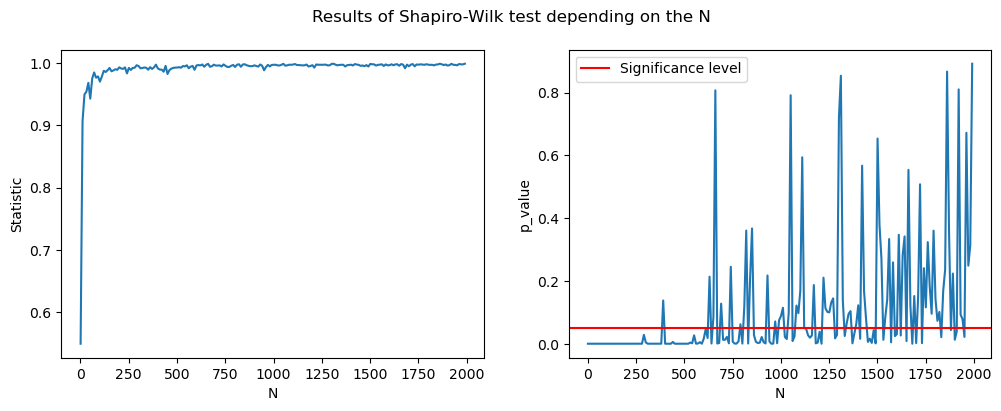

In [146]:
# Строим графики
plot_shapiro_results(
    x_range=range(1, 2001, 10), 
    criterions=shapiro_criterion_values,
    p_values=p_values,
    variable='N'
)

Видим, что значение статистики критерия сходится к 1 с ростом выборки.

In [7]:
# Проиллюстрируем ЦПТ, построив распределения выборочных средних при некоторых N

sizes = [10, 50, 250, 1500]
x_means_by_size = {}

for n in sizes:
    x_means_by_size[n] = []
    for i in range(1000):
        sample = lognorm.rvs(s=sigma, scale=np.exp(mu), size=n)
        x_means_by_size[n].append(np.mean(sample))

Если $X_1, X_2, ..., X_n$ независимы и имеют одинаковое распределение со средним $\mu$ и дисперсией $\sigma^2$, то распределение величины $\bar{X_n}$ стремится к $N(\mu, \frac{\sigma^2}{n})$

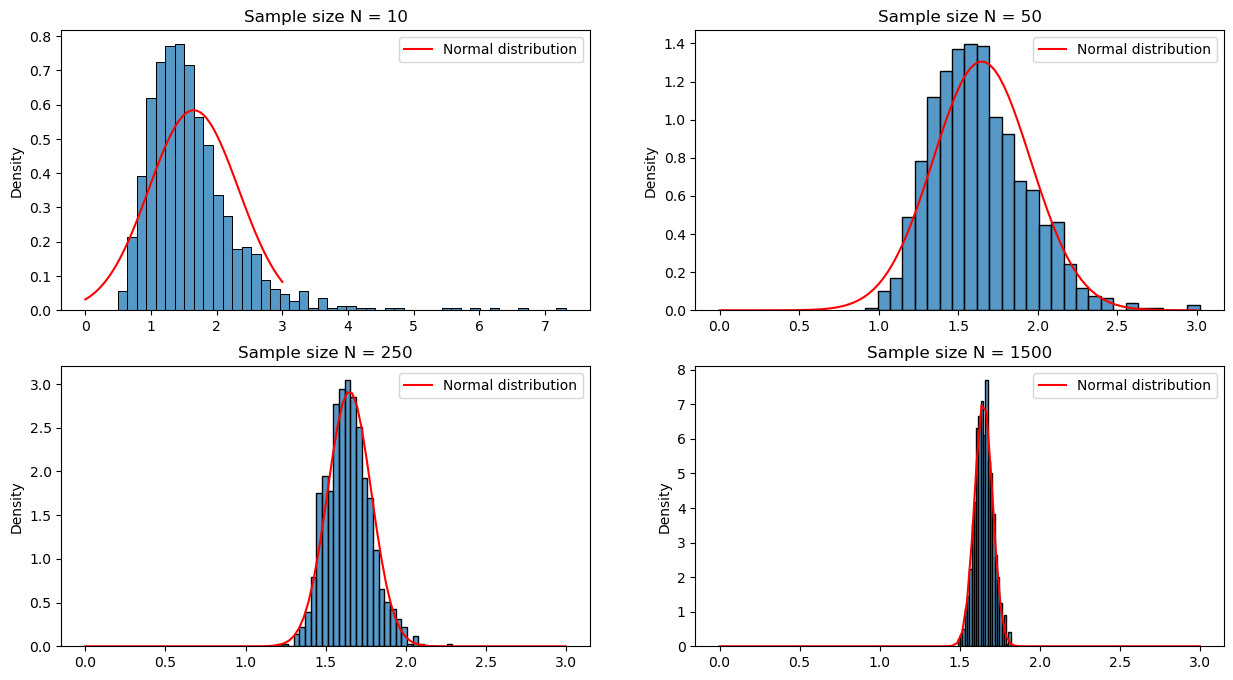

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for ax, n, means in zip(axes.flat, x_means_by_size.keys(), x_means_by_size.values()):
    sns.histplot(means, stat='density', ax=ax)

    # создаем соответствующее нормальное распределение со средним lognorm_mean и дисперсией lognorm_var / n
    norm_distr = norm()
    x_axis = np.linspace(0, 3, 100)
    ax.plot(x_axis, norm.pdf(x_axis, loc=lognorm_mean, scale=lognorm_std / np.sqrt(n)), 'r', label='Normal distribution')
    ax.set_title(f'Sample size N = {n}')
    ax.legend()

## Пункт 2 - зависимость от параметров логнормального распределения

In [27]:
# Будем менять mu, а sigma оставим фиксированным
n = 2000  # размер выборки
sigma = 1

shapiro_criterion_values, p_values = [], []
for mu in tqdm(range(-20, 21)):
    x_means = []  # выборочные средние для 1000 выборок фиксированного размера n
    for i in range(1000):
        sample = lognorm.rvs(s=sigma, scale=np.exp(mu), size=n)
        x_means.append(np.mean(sample))

    # Получили распределение случайной величины "выборочное среднее выборки размера n" 
    x_means = np.array(x_means)

    # Проверяем критерий Шапиро-Уилка, гипотеза H_0 - величина имеет нормальное распределение
    res = shapiro(x_means)
    shapiro_criterion_values.append(res.statistic)
    p_values.append(res.pvalue)

  0%|          | 0/41 [00:00<?, ?it/s]

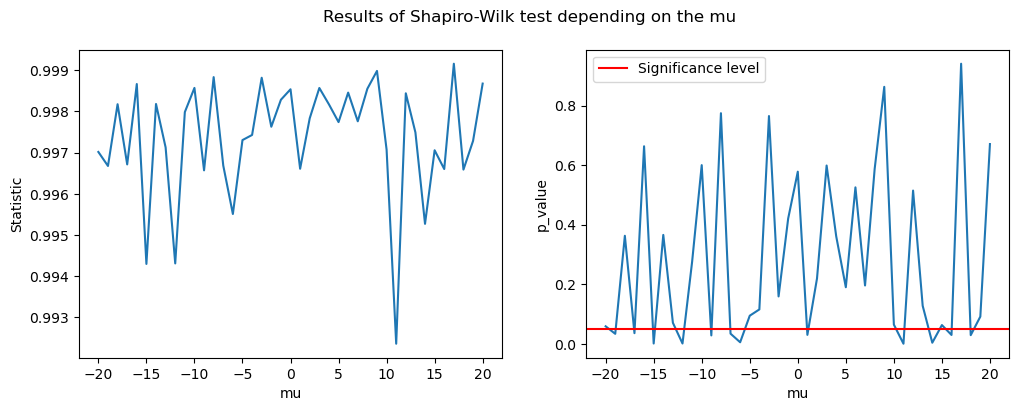

In [31]:
# Строим графики
plot_shapiro_results(
    x_range=range(-20, 21), 
    criterions=shapiro_criterion_values,
    p_values=p_values,
    variable='mu'
)

Изменение среднего не сильно влияет на значение статистики критерия: они колеблются возле 1.

In [140]:
# Будем менять sigma, а mu оставим фиксированным
n = 2000  # размер выборки
mu = 0

shapiro_criterion_values, p_values = [], []
for sigma in tqdm(range(1, 20)):
    x_means = []  # выборочные средние для 1000 выборок фиксированного размера n
    for i in range(1000):
        sample = lognorm.rvs(s=sigma, scale=np.exp(mu), size=n)
        x_means.append(np.mean(sample))

    # Получили распределение случайной величины "выборочное среднее выборки размера n" 
    x_means = np.array(x_means)

    # Проверяем критерий Шапиро-Уилка, гипотеза H_0 - величина имеет нормальное распределение
    res = shapiro(x_means)
    shapiro_criterion_values.append(res.statistic)
    p_values.append(res.pvalue)

  0%|          | 0/19 [00:00<?, ?it/s]

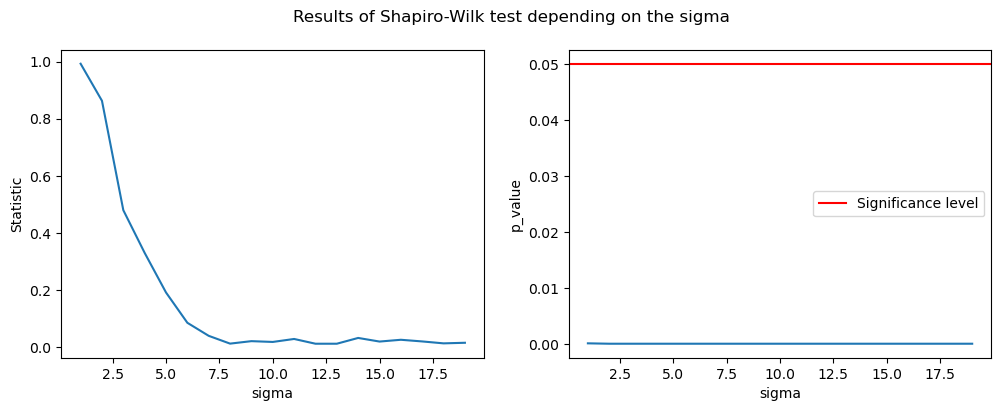

In [142]:
# Строим графики
plot_shapiro_results(
    x_range=range(1, 20), 
    criterions=shapiro_criterion_values,
    p_values=p_values,
    variable='sigma'
)

С ростом дисперсии сходимость не наблюдается.

# Задача 2

Возьмите [данные](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop) с Kaggle и оцените равномерность разбиения их на группы (для будущего АБ-теста) с помощью различных видов хеширования:

1. md5
2. sha256
3. Улучшится ли равномерность, если вместо одинарного использования md5 применить [вот такую](https://towardsdatascience.com/assign-experiment-variants-at-scale-in-a-b-tests-e80fedb2779d) двухуровневую процедуру с тем же md5, проверить на тех же данных

In [303]:
import hashlib
import pandas as pd
import numpy as np
from scipy.stats import chisquare

df = pd.read_csv('2019-Dec.csv')
print(df.shape)
df.head()

(3533286, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


Будем разбивать на группы по user_id. Пусть N_groups = 15

In [105]:
n_groups = 15
user_ids = df['user_id'].unique()

In [304]:
def plot_users_by_groups(group_counts, function_name):
    n_groups = len(group_counts)
    plt.bar(x=range(n_groups), height=group_counts)
    plt.xticks(range(n_groups))
    plt.yticks(np.arange(0, 25001, 2500))
    plt.xlabel('Group id')
    plt.ylabel('Number of users')
    plt.title(f'Distribution of users ({function_name} hash function)')

## Пункт 1 - использование md5

In [279]:
# Разбиваем пользователей на группы
salt = 'homework'
group_counts_md5 = np.zeros(n_groups)

for user_id in user_ids:
    hash_argument = (str(user_id) + salt).encode()
    hexdigest = hashlib.md5(hash_argument).hexdigest()
    group_id = int(hexdigest, base=16) % n_groups
    group_counts_md5[group_id] += 1

In [306]:
# Критерий хи-квадрат
chisquare(group_counts_md5)

Power_divergenceResult(statistic=8.978381970747309, pvalue=0.8324329314347296)

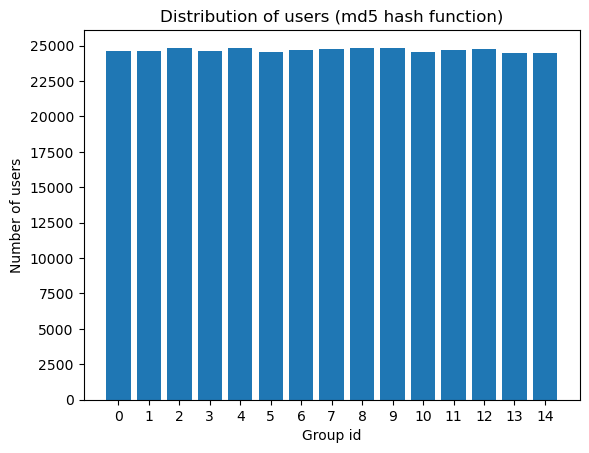

In [305]:
# Смотрим на распределение групп
plot_users_by_groups(group_counts_md5, 'md5')

Так как в рассчитанном критерии p_value > 0.05, то мы не можем отвергнуть нулевую гипотезу о том, что частоты равны. График подтверждает и визуализирует результат. Распределение равномерное.

## Пункт 2 - использование sha256

In [281]:
# Разбиваем пользователей на группы
salt = 'homework'
group_counts_sha256 = np.zeros(n_groups)

for user_id in user_ids:
    hash_argument = (str(user_id) + salt).encode()
    hexdigest = hashlib.sha256(hash_argument).hexdigest()
    group_id = int(hexdigest, base=16) % n_groups
    group_counts_sha256[group_id] += 1

In [308]:
# Критерий хи-квадрат
chisquare(group_counts_sha256)

Power_divergenceResult(statistic=12.136391880136374, pvalue=0.5953503432427905)

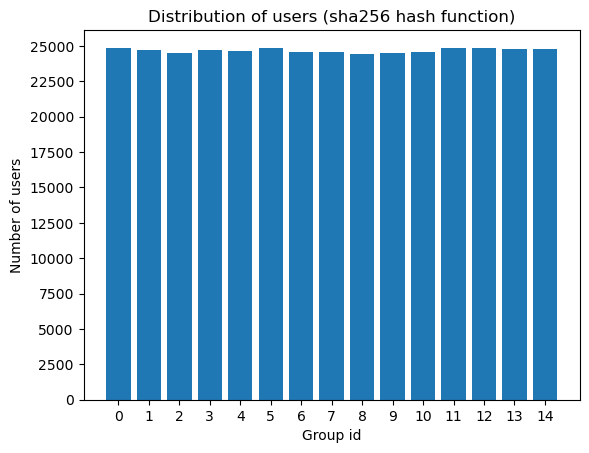

In [307]:
# Смотрим на распределение групп
plot_users_by_groups(group_counts_sha256, 'sha256')

Аналогично пункту 1, в рассчитанном критерии p_value > 0.05, поэтому мы не можем отвергнуть нулевую гипотезу о том, что частоты равны. График подтверждает и визуализирует результат. Распределение равномерное.

## Пункт 3 - двухуровневая процедура с md5

In [309]:
# Разбиваем пользователей на группы
salt = 'homework'
exposure_rate = 0.6
group_counts = np.zeros(n_groups)

for user_id in user_ids:
    # step 1
    s_e = (str(user_id) + salt + 'Exposure').encode()
    h_e = hashlib.md5(s_e).hexdigest()
    r_e = int(h_e, base=16) % n_groups

    if r_e > exposure_rate * 100:
        continue
    else:
        # step 2
        s_b = (str(user_id) + salt + 'Bucket').encode()
        h_b = hashlib.md5(s_b).hexdigest()
        group_id = int(h_b, base=16) % n_groups
        group_counts[group_id] += 1

In [311]:
# Критерий хи-квадрат
chisquare(group_counts)

Power_divergenceResult(statistic=12.42459624912874, pvalue=0.5722446967208474)

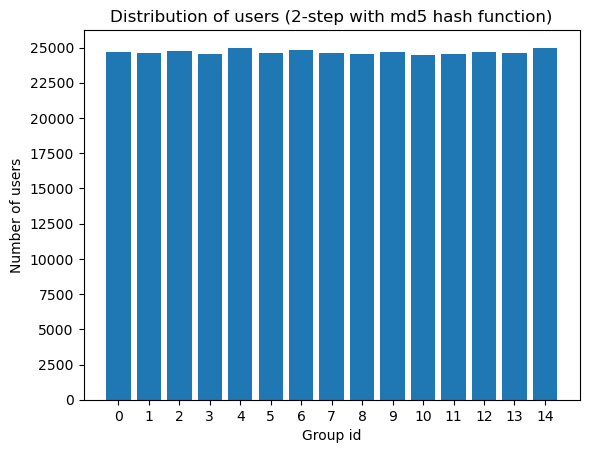

In [312]:
# Смотрим на распределение групп
plot_users_by_groups(group_counts, '2-step with md5')

В целом, как будто разница особо и не заметна. Распределение так же равномерное.

# Задача 3

Напишите функцию для оценки доверительного интервала для параметра в выборке с помощью Пуассоновского бутстрепа.
Функция должна принимать на вход выборку и агрегационную функцию, с помощью которой будет вычисляться статистика по выборке, например:

    PoissonBootstrap(sample, np.median)
    
или
    
    PoissonBootstrap(sample, lambda x: np.median(x)/np.mean(x))
    
    

In [436]:
def PoissonBootstrap(sample, agg_func):
    """ Считает долго, не могу понять как улучшить....
        Как быстро посчитать среднее через такой бутстреп - понятно: 
        умножить array исходной выборки на array вхождений, сложить, а затем поделить на сумму числа вхождений, нагенеренных Пуассоном
    """
    
    B = 5000  # количество бутстрепных выборок
    n = len(sample)
    alpha = 0.05

    # точечная оценка статистики
    pe = agg_func(sample)

    # значения статистики для каждой бутстрепной выборки
    bootstrap_statistics = []
    counts = np.random.poisson(lam=1, size=(B, n))
    for i in range(B):
        bootstrap_sample = []
        for item, count in zip(sample, counts[i]):
            bootstrap_sample.extend([item]*count)
        bootstrap_statistics.append(agg_func(bootstrap_sample))

    # перцентильный доверительный интервал
    ci = np.quantile(bootstrap_statistics, [alpha/2, 1 - alpha/2])

    return pe, ci


def Bootstrap(sample, agg_func):
    B = 5000  # количество бутстрепных выборок
    n = len(sample)  # размер исходной выборки
    alpha = 0.05

    # точечная оценка статистики
    pe = agg_func(sample)

    # значения статистики для каждой бутстрепной выборки
    bootstrap_statistics = []
    for _ in range(B):
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        bootstrap_statistics.append(agg_func(bootstrap_sample))

    # перцентильный доверительный интервал
    ci = np.quantile(bootstrap_statistics, [alpha/2, 1 - alpha/2])

    return pe, ci

In [291]:
# проверяем
n = 1000  # размер выборки
sample = np.random.normal(loc=70, scale=10, size=n)

In [315]:
print('Пуассоновский бутстреп')
PoissonBootstrap(sample, np.mean)
# PoissonBootstrap(sample, lambda x: np.median(x)/np.mean(x))

Пуассоновский бутстреп


(69.95673873620554, array([69.36355395, 70.59968418]))

In [316]:
print('Классический бутстреп')
Bootstrap(sample, np.mean)
# Bootstrap(sample, lambda x: np.median(x)/np.mean(x))

Классический бутстреп


(69.95673873620554, array([69.34472218, 70.59705462]))

# Задача 4

C помощью численного эксперимента показать, что t-тест над рангами в некотором смысле эквивалентен тесту Манна-Уитни.
В качестве пояснения можете использовать материал [Линделёва](https://lindeloev.github.io/tests-as-linear/)

In [415]:
from scipy.stats import mannwhitneyu, ttest_ind, rankdata

In [437]:
# Напишем функцию для t-теста над рангами

def ttest_on_ranks(sample_1, sample_2):
    mask_1 = np.zeros(len(sample_1))  # первую выборку помечаем 0-ми
    mask_2 = np.ones(len(sample_2))  # вторую выборку помечаем 1-ми

    # сливаем обе выборки и их метки
    union_sample = np.concatenate([sample_1, sample_2])
    mask = np.concatenate([mask_1, mask_2])

    # сортируем объединенную выборку и метки
    union_sample, mask = zip(*sorted(zip(union_sample, mask), key=lambda x: x[0]))
    mask = np.array(mask).astype('bool')

    # считаем ранги
    ranks = rankdata(union_sample)
    ranks_1 = ranks[~mask]  # ранги первой выборки
    ranks_2 = ranks[mask]  # ранги второй выборки

    return ttest_ind(ranks_1, ranks_2)

In [432]:
# выборки из разных распределений - pvalue должен быть меньше уровня значимости

mw_statistic, mw_pvalue = [], []
ttest_statistic, ttest_pvalue = [], []

for n in range(10, 1001, 20):
    # будем брать выборки из нормального и равномерного распределения
    sample_1 = np.random.normal(loc=0, scale=1, size=n)
    sample_2 = np.random.uniform(low=-4, high=2, size=n)

    # тест Манна-Уитни
    mw_res = mannwhitneyu(sample_1, sample_2)
    mw_statistic.append(mw_res.statistic)
    mw_pvalue.append(mw_res.pvalue)

    # t-тест над рангами
    ttest_res = ttest_on_ranks(sample_1, sample_2)
    ttest_statistic.append(ttest_res.statistic)
    ttest_pvalue.append(ttest_res.pvalue)

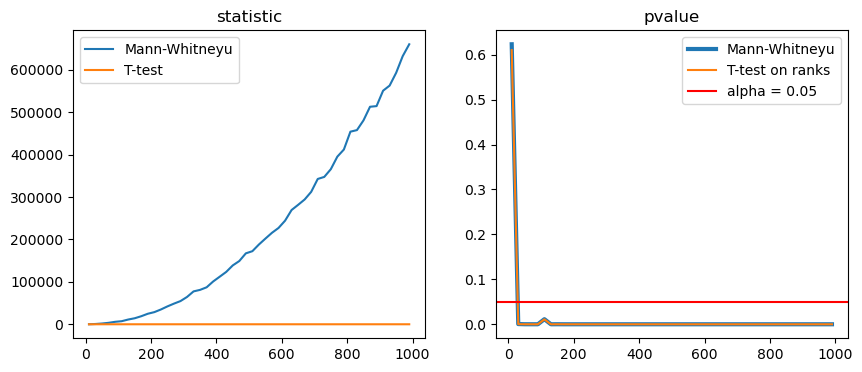

In [440]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(range(10, 1001, 20), mw_statistic, label='Mann-Whitneyu')
axes[0].plot(range(10, 1001, 20), ttest_statistic, label='T-test')
axes[0].set_title('statistic')
axes[0].legend()

axes[1].plot(range(10, 1001, 20), mw_pvalue, linewidth=3, label='Mann-Whitneyu')
axes[1].plot(range(10, 1001, 20), ttest_pvalue, label='T-test on ranks')
axes[1].axhline(y=0.05, color='r', label='alpha = 0.05')
axes[1].set_title('pvalue')
axes[1].legend();

In [443]:
# выборки из похожих распределений - возьмем два нормальных распределения

mw_statistic, mw_pvalue = [], []
ttest_statistic, ttest_pvalue = [], []

for n in range(10, 1001, 20):
    sample_1 = np.random.normal(loc=0, scale=1, size=n)
    sample_2 = np.random.normal(loc=0, scale=1.5, size=n)

    mw_res = mannwhitneyu(sample_1, sample_2)
    mw_statistic.append(mw_res.statistic)
    mw_pvalue.append(mw_res.pvalue)

    ttest_res = ttest_on_ranks(sample_1, sample_2)
    ttest_statistic.append(ttest_res.statistic)
    ttest_pvalue.append(ttest_res.pvalue)

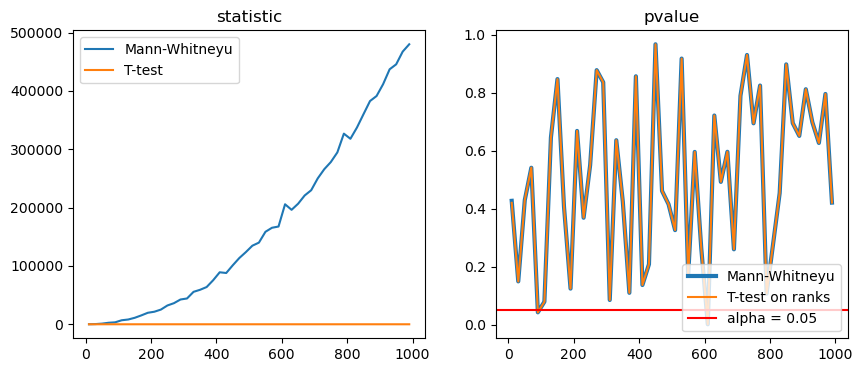

In [444]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(range(10, 1001, 20), mw_statistic, label='Mann-Whitneyu')
axes[0].plot(range(10, 1001, 20), ttest_statistic, label='T-test')
axes[0].set_title('statistic')
axes[0].legend()

axes[1].plot(range(10, 1001, 20), mw_pvalue, linewidth=3, label='Mann-Whitneyu')
axes[1].plot(range(10, 1001, 20), ttest_pvalue, label='T-test on ranks')
axes[1].axhline(y=0.05, color='r', label='alpha = 0.05')
axes[1].set_title('pvalue')
axes[1].legend();

Таким образом, t-тест над рангами в определенном смысле действительно эквивалентен тесту Манна-Уитни над исходными выборками.